# AAND BCI - Exercise Sheet #02

#### Name:

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import bci_minitoolbox as bci

## Preparation: Loading Data

In [2]:
fname = 'erp_hexVPsag.npz'
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)

## Exercise 1: Plotting ERPs  (2 points)

Plot the average ERPs corresponding to *target* and *nontarget* stimuli in the time interval -100 to 1000 ms for the channels Cz and PO7.
In order to make the curves look reasonable, a so called 'baseline correction' should be performed: for each channel and trial, calculate the average across the prestimulus time interval -100 to 0 ms. This results in one value per channel and trial. Subtract this 'baseline' value from each (single channel/single trial) time course. 
The function `baseline` is provided in the `bci_minitoolbox`. It is recommended to have a look at the code.

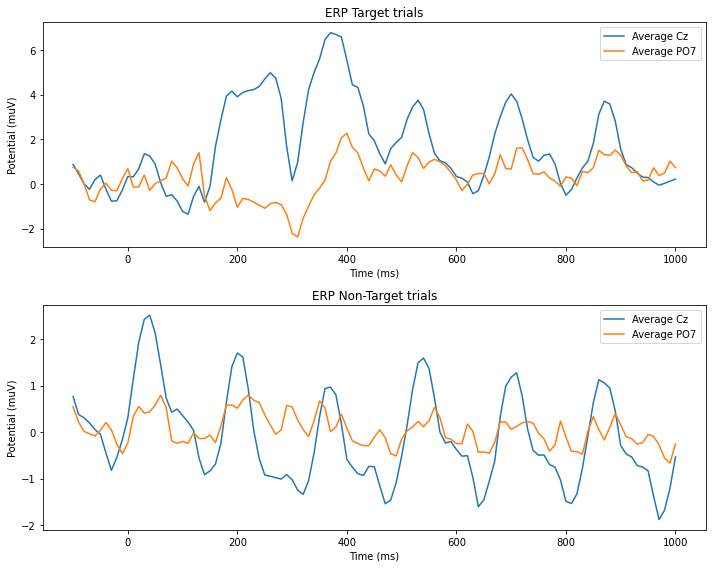

In [3]:
chans = ['Cz', 'PO7']
ival = [-100, 1000]
ref_ival = [-100, 0]

matches = []
num = -1

for match in clab:
    num +=1
    if "Cz" in match:
        Cz_pos = num
    if "PO7" in match:
        PO7_pos = num
        
Cz = cnt[Cz_pos]
PO7 = cnt[PO7_pos]

epos, epos_t = bci.makeepochs(cnt, fs, mrk_pos, ival)
epos_corr = bci.baseline(epos, epos_t, ref_ival)

mrk_target = np.where(mrk_class < 0.5)
mrk_nontarget = np.where(mrk_class > 0.5)

epos_Cz_target = epos_corr[:,Cz_pos,mrk_target]
epos_Cz_nontarget = epos_corr[:,Cz_pos,mrk_nontarget]
epos_PO7_target = epos_corr[:,PO7_pos,mrk_target]
epos_PO7_nontarget = epos_corr[:,PO7_pos,mrk_nontarget]

avg_Cz_target = np.mean(epos_Cz_target,axis=2)
avg_Cz_nontarget = np.mean(epos_Cz_nontarget,axis=2)
avg_PO7_target = np.mean(epos_PO7_target,axis=2)
avg_PO7_nontarget = np.mean(epos_PO7_nontarget,axis=2)

fig = plt.figure(figsize=(10,8))

plt.subplot(211)
plt.ylabel('Potential (muV)')
plt.xlabel('Time (ms)')
plt.plot(epos_t,avg_Cz_target,label='Average Cz');
plt.plot(epos_t,avg_PO7_target,label='Average PO7')
plt.legend();
plt.title('ERP Target trials')

plt.subplot(212)
plt.ylabel('Potential (muV)')
plt.xlabel('Time (ms)')
plt.plot(epos_t,avg_Cz_nontarget,label='Average Cz');
plt.plot(epos_t,avg_PO7_nontarget,label='Average PO7')
plt.legend();
plt.title('ERP Non-Target trials')

plt.tight_layout()

## Exercise 2: Scatter Plot of 2D Features  (3 points + 1 bonus)

Make a scatter plot of the two distributions - *targets* and *nontargets*, one dot for each trial. On the `x`-axis, plot the value of channel Cz at `t` = 380 ms, and at the `y`-axis the value of PO7 at `t` = 320 ms. Draw for both distributions the two principal axes, with the lengths of the axes being the standard deviation of the data in
that direction. 
**Bonus:** Draw also the corresponding ellipses. You can get that with a transformation of the unit circle.

In [4]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`
        
    Credit: https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    

    ellipse.set_transform(transf + ax.transData)
    
    return ax.add_patch(ellipse)

In [5]:
chans = ['Cz', 'PO7']
time_points = [380, 320]
ind = [np.argwhere(epos_t==time_points[0]), np.argwhere(epos_t==time_points[1])]

target_Cz = epos_Cz_target[ind[0],:].flatten()
target_PO7 = epos_PO7_target[ind[1],:].flatten()

nontarget_Cz = epos_Cz_nontarget[ind[0],:].flatten()
nontarget_PO7 = epos_PO7_nontarget[ind[1],:].flatten()

center_target = [np.mean([target_Cz]),np.mean([target_PO7])]
center_nontarget =[np.mean([nontarget_Cz]),np.mean([nontarget_PO7])]

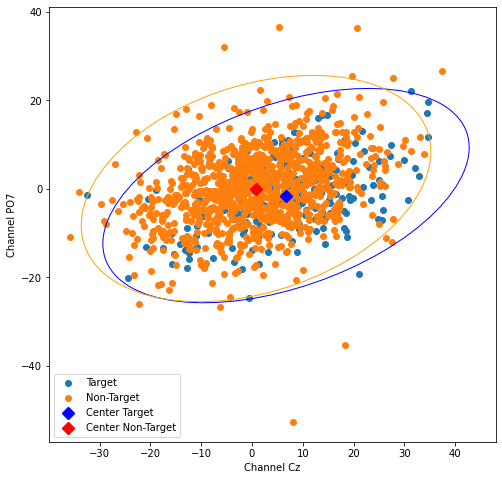

In [6]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)

ax.scatter(target_Cz,target_PO7,label='Target')
ax.scatter(nontarget_Cz,nontarget_PO7,label='Non-Target')
ax.set_xlabel('Channel Cz')
ax.set_ylabel('Channel PO7');
confidence_ellipse(target_Cz,target_PO7,ax,edgecolor='blue')
confidence_ellipse(nontarget_Cz,nontarget_PO7,ax,edgecolor='orange')

plt.scatter(center_target[0],center_target[1],marker='x',linewidth=10,c='blue',label='Center Target')
plt.scatter(center_nontarget[0],center_nontarget[1],marker='x',linewidth=10,c='red',label='Center Non-Target');
plt.legend();

## Exercise 3: Scalp Topographies of ERPs  (2 points)

Calculate the average potential separately for the classes *target* and *non-target* in the following time intervals [ms]: [160 200], [230 260], [300 320], and [380 430]. (This involves averaging over all trials of the respective class and averaging over all sample points in the respective time interval.)
Visualize the result as scalp topographies using the function `bci.scalpmap`, i.e., 4 maps for each class.
**Note:** In order to make the maps look reasonable, do a *baseline correction* as in the previous task. To make the maps comparable, use a common scale for the colorbar (see help of `scalpmap`). For ERPs, a range should be chosen for the colormap, which is symmetric around 0.

In [7]:
def scalp_top(ival,epos,epos_t,mrk_index):
    
    ind = [np.argwhere(epos_t==ival[0]), np.argwhere(epos_t==ival[1])]
    scalpm = np.mean(np.mean(epos[int(ind[0]):int(ind[1]),:,mrk_index], axis = 0)[:,0,:], axis = 1)
    
    return scalpm

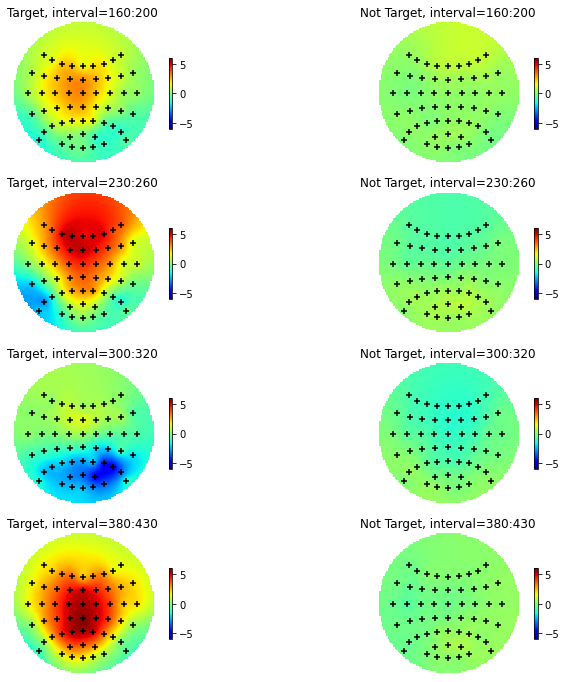

In [8]:
ival = [[160, 200], [230, 260], [300, 320], [380, 430]]
fig = plt.figure(figsize=(12,12))

for i in range(0,len(ival)):
    
    fig.add_subplot(4,2,2*i+1)
    plt.title(f'Target, interval={ival[i][0]}:{ival[i][1]}')
    scalpm = scalp_top(ival[i],epos_corr,epos_t,mrk_target)
    bci.scalpmap(mnt,scalpm,[6,-6])
    
    fig.add_subplot(4,2,2*(i+1))
    plt.title(f'Not Target, interval={ival[i][0]}:{ival[i][1]}')
    scalpm = scalp_top(ival[i],epos_corr,epos_t,mrk_nontarget)
    bci.scalpmap(mnt,scalpm,[6,-6])

## Exercise 4: Visualization with the Biserial Correlation Coefficient  (3 points)

Implement a function for the calculation of the signed `r^2`-value (see point-biserial correlation coefficient in BCI lecture \#02). From the given data set, extract epochs for the time interval [-100 600] ms relativ to each stimulus presentation.  Calculate for each channel and each point in time the signed `r^2`-value wrt. classes
*target* vs. *non-target* and visualize this (channel `x` time points) matrix (`pl.imshow`). Again, use 100 ms prestimulus for baseline correction.

In [9]:
def signed_r_square(epo, y):
    '''
    Synopsis:
        epo_r = signed_r_square(epo, y)
    Arguments:
        epo:    3D array of segmented signals (time x channels x epochs), 
                see makeepochs
        y:      labels with values 0 and 1 (1 x epochs)
    Output:
        epo_r:  2D array of signed r^2 values (time x channels)
    '''
    N1 = np.sum(y==0)
    N2 = np.sum(y==1)
    prefact = N1*N2/((N1+N2)**2)
    
    variances = np.var(epo,axis=2)
    
    mrk_target = np.where(y < 0.5)
    mrk_nontarget = np.where(y > 0.5)
    
    mean1 = np.mean(epo[:,:,mrk_target],axis=3)
    mean1 = mean1.reshape((mean1.shape[0],mean1.shape[1]))
    mean2 = np.mean(epo[:,:,mrk_nontarget],axis=3)
    mean2 = mean2.reshape((mean1.shape[0],mean1.shape[1]))
    
    epo_r = (prefact/variances)*(mean1-mean2)**2*np.sign(mean1-mean2)
    
    return epo_r

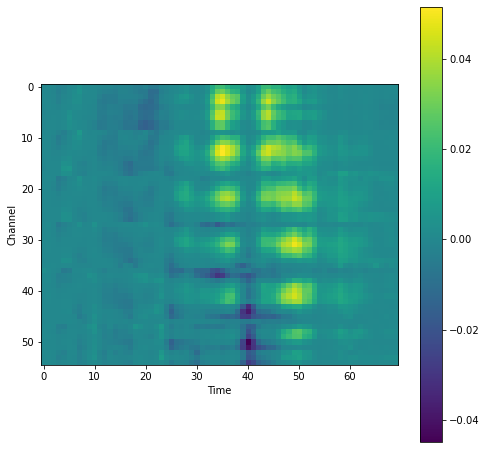

In [10]:
ival = [-100, 600]
ref_ival = [-100, 0]

ind = [0, int(np.argwhere(epos_t==ival[1]))]
epos_corr_ival = epos_corr[ind[0]:ind[1]]
epo_r = signed_r_square(epos_corr_ival,mrk_class)

plt.figure(figsize=(8,8))
plt.imshow(epo_r.T)
plt.xlabel('Time')
plt.ylabel('Channel')
plt.colorbar();